## To run directly from the site, this must be opened with Anaconda Navigator NOT in terminal jupyter notebook.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# compare to direct link to John Hopkins timeset data 
# dataset has CHANGED location as of 3/23/20
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
covid = pd.read_csv(data, sep=",")

# preview our data
covid.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [3]:
# extra step to copy file
# if we need to take current downloaded data, can put above step in comments
covid_deaths = covid.copy()
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
# check that no columns are NaN
covid_deaths.isna().sum().sum()

185

In [5]:
covid_deaths[['Province/State']] = covid_deaths[['Province/State']].fillna('') 
covid_deaths.fillna(0, inplace=True)

In [6]:
# final check for NaN
covid_deaths.isna().sum().sum()

0

In [7]:
today=datetime.now()
#yesterday = datetime.now() - timedelta(1)
today_date = today.strftime('%m/%d/%y').lstrip("0").replace(" 0", " ")
today_date

'5/17/20'

In [8]:
country_locations = covid_deaths[['Country/Region', 'Lat', 'Long']]
country_locations

,Country/Region,Lat,Long
0,Afghanistan,33.000000,65.000000
1,Albania,41.153300,20.168300
2,Algeria,28.033900,1.659600
3,Andorra,42.506300,1.521800
4,Angola,-11.202700,17.873900
...,...,...,...
261,Sao Tome and Principe,0.186360,6.613081
262,Yemen,15.552727,48.516388
263,Comoros,-11.645500,43.333300
264,Tajikistan,38.861034,71.276093


In [9]:
daily_totals = covid_deaths.iloc[:, 4:].max()
daily_totals

1/22/20       17
1/23/20       17
1/24/20       24
1/25/20       40
1/26/20       52
           ...  
5/13/20    84119
5/14/20    85898
5/15/20    87530
5/16/20    88754
5/17/20    89562
Length: 117, dtype: int64

In [10]:
covid_deaths_count = daily_totals.max()
covid_deaths_count

89562

In [11]:
current_totals= covid_deaths[['Country/Region',today_date]]
current_totals

,Country/Region,5/17/20
0,Afghanistan,169
1,Albania,31
2,Algeria,548
3,Andorra,51
4,Angola,2
...,...,...
261,Sao Tome and Principe,7
262,Yemen,20
263,Comoros,1
264,Tajikistan,39


In [12]:
# checking count of country labels to see if any are duplicated
country_list = covid_deaths['Country/Region'].value_counts()
country_list

China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Maldives           1
Laos               1
Liechtenstein      1
Bhutan             1
Djibouti           1
Name: Country/Region, Length: 188, dtype: int64

In [13]:
# duplicate countries aggregated
countries_set = set(current_totals['Country/Region'])
country_totals = {'Country': list(countries_set), 'Total': []} 
for country in countries_set:
    df = current_totals[current_totals['Country/Region'] == country]
    country_totals['Total'].append(df[today_date].sum())
country_totals = pd.DataFrame(country_totals)
country_totals = country_totals.set_index('Country')
country_totals

,Total
Country,
Italy,31908
Canada,5903
Tunisia,45
US,89562
Libya,3
...,...
Kuwait,112
Rwanda,0
San Marino,41


In [14]:
ls

2020-05-17/
AnalysisSG.ipynb
Current_Deaths.png
DATA choice.ipynb
Feature Engineering Coronavirus - DATA-Copy1.ipynb
Feature Engineering Coronavirus - DATA.ipynb
Mortality for Democracies.png
Mortality for Non-Democracies.png
MortalitySorted.png
TransformEIU.ipynb
archived_data/


In [15]:
data = '../data/Other/TotalPopulationBySex.csv'
populations = pd.read_csv(data)
populations = populations[populations["Time"] == 2020]
populations.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
70,4,Afghanistan,2,Medium,2020,2020.5,19976.265,18952.076,38928.341,59.627
151,4,Afghanistan,3,High,2020,2020.5,19976.265,18952.076,38928.341,59.627
232,4,Afghanistan,4,Low,2020,2020.5,19976.265,18952.076,38928.341,59.627
313,4,Afghanistan,5,Constant fertility,2020,2020.5,19976.265,18952.076,38928.341,59.627
394,4,Afghanistan,6,Instant replacement,2020,2020.5,19976.265,18952.076,38928.341,59.627


In [16]:
countries_a = list(country_totals.index)
countries_b = populations['Location'].unique()

shared = [country_name for country_name in countries_a if country_name in countries_b]
not_shared_a = [country_name for country_name in countries_a if country_name not in countries_b]
not_shared_b = [country_name for country_name in countries_b if country_name not in countries_a]

In [17]:
not_shared_a.sort()
not_shared_a

['Bolivia',
 'Brunei',
 'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Diamond Princess',
 'Iran',
 'Korea, South',
 'Kosovo',
 'Laos',
 'MS Zaandam',
 'Moldova',
 'Russia',
 'Syria',
 'Taiwan*',
 'Tanzania',
 'US',
 'Venezuela',
 'Vietnam',
 'West Bank and Gaza']

In [18]:
not_shared_b.sort()
not_shared_b

['Africa',
 'African Group',
 'African Union',
 'African Union: Central Africa',
 'African Union: Eastern Africa',
 'African Union: Northern Africa',
 'African Union: Southern Africa',
 'African Union: Western Africa',
 'African, Caribbean and Pacific (ACP) Group of States',
 'American Samoa',
 'Andean Community',
 'Anguilla',
 'Aruba',
 'Asia',
 'Asia-Pacific Economic Cooperation (APEC)',
 'Asia-Pacific Group',
 'Association of Southeast Asian Nations (ASEAN)',
 'Australia/New Zealand',
 'BRIC',
 'BRICS',
 'Belt-Road Initiative (BRI)',
 'Belt-Road Initiative: Africa',
 'Belt-Road Initiative: Asia',
 'Belt-Road Initiative: Europe',
 'Belt-Road Initiative: Latin America and the Caribbean',
 'Belt-Road Initiative: Pacific',
 'Bermuda',
 'Black Sea Economic Cooperation (BSEC)',
 'Bolivarian Alliance for the Americas (ALBA)',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Caribbean',
 'Caribbean Community and Com

In [19]:
spelling_changes = {
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Brunei Darussalam': 'Brunei',
    'Côte d\'Ivoire': 'Cote d\'Ivoire',
    'Gambia': 'Gambia, The',
    'Iran (Islamic Republic of)': 'Iran',
    'Republic of Korea': 'Korea, South',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'China, Taiwan Province of China': 'Taiwan*',
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'US',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam'
}

In [20]:
current_populations = {'Country': [], 'Population': []}
for country_name in populations['Location'].unique():
    if country_name in spelling_changes.keys():
        key_name = spelling_changes[country_name]
    elif country_name not in shared:
        continue
    else:
        key_name = country_name
    current_populations['Country'].append(key_name)
    current_populations['Population'].append(populations[populations['Location'] == country_name]['PopTotal'].iloc[0]) 
current_populations = pd.DataFrame(current_populations)
current_populations = current_populations.set_index('Country')
current_populations

,Population
Country,
Afghanistan,38928.341
Albania,2877.800
Algeria,43851.043
Andorra,77.265
Angola,32866.268
...,...
Vietnam,97338.583
Western Sahara,597.330
Yemen,29825.968


In [21]:
country_totals = country_totals.join(current_populations)
country_totals

,Total,Population
Country,,
Italy,31908,60461.828
Canada,5903,37742.157
Tunisia,45,11818.618
US,89562,331002.647
Libya,3,6871.287
...,...,...
Kuwait,112,4270.563
Rwanda,0,12952.209
San Marino,41,33.938


In [22]:
country_totals['Death rate'] = country_totals['Total'] / country_totals['Population']
country_totals.sort_values(by=['Death rate'], ascending=False).head(20)

,Total,Population,Death rate
Country,,,
San Marino,41,33.938,1.208085
Belgium,9052,11589.616,0.781044
Andorra,51,77.265,0.660066
Spain,27563,46754.783,0.589523
Italy,31908,60461.828,0.527738
United Kingdom,34716,67886.004,0.511387
France,28111,65273.512,0.430665
Sweden,3679,10099.270,0.364284
Netherlands,5699,17134.873,0.332597


In [23]:
country_totals['Total'].sum()

315185

## Finding countries that are missing Population Data

In [24]:
# checking what is missing
country_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Italy to Uzbekistan
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total       188 non-null    int64  
 1   Population  177 non-null    float64
 2   Death rate  177 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.9+ KB


In [25]:
country_totals.isna().sum()

Total          0
Population    11
Death rate    11
dtype: int64

In [26]:
missing = country_totals[(country_totals['Population'].isna())]
missing

,Total,Population,Death rate
Country,,,
Congo (Kinshasa),61,NaN,NaN
Gambia,1,NaN,NaN
Laos,0,NaN,NaN
Kosovo,29,NaN,NaN
Bahamas,11,NaN,NaN
Moldova,211,NaN,NaN
Diamond Princess,13,NaN,NaN
Congo (Brazzaville),15,NaN,NaN
West Bank and Gaza,2,NaN,NaN


In [27]:
# Deaths total for missing countries
missing['Total'].sum()

351

In [28]:
# Reset dataframe to show all columns
country_totals = country_totals.reset_index()

In [29]:
country_totals

,Country,Total,Population,Death rate
0,Italy,31908,60461.828,0.527738
1,Canada,5903,37742.157,0.156403
2,Tunisia,45,11818.618,0.003808
3,US,89562,331002.647,0.270578
4,Libya,3,6871.287,0.000437
...,...,...,...,...
183,Kuwait,112,4270.563,0.026226
184,Rwanda,0,12952.209,0.000000
185,San Marino,41,33.938,1.208085
186,Bulgaria,108,6948.445,0.015543


In [30]:
country_totals['Total'].sum()

315185

In [31]:
country_totals['Population'].sum()

7577393.548

## Visualizations

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

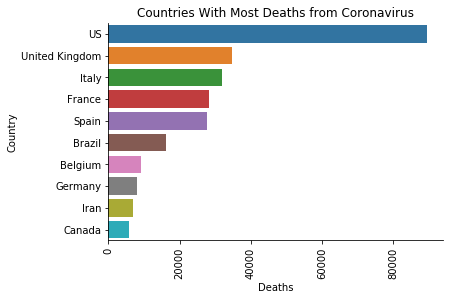

In [33]:
data =country_totals.sort_values(by=['Total'], ascending=False).head(10)
sns.barplot(x = "Total", y='Country', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Deaths')
plt.title("Countries With Most Deaths from Coronavirus")
plt.savefig('Current_Deaths.png')

Text(0.5, 0, 'Mortality rate per 1000 people by population')

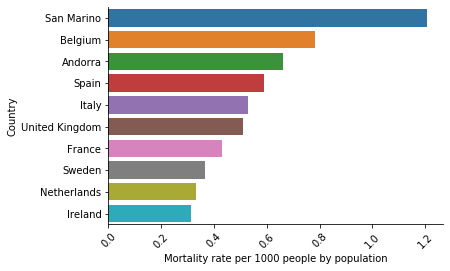

In [34]:
data =country_totals.sort_values(by=['Death rate'], ascending=False).head(10)
sns.barplot(x = "Death rate", y='Country', data=data)
sns.despine()
plt.xticks(rotation=45)
plt.xlabel('Mortality rate per 1000 people by population')

Note about the tiny countries above:
- San Marina is surrounded by Italy.
- Andorra is on the border of Spain and France.

### Looking at top 20 countries by population

Text(0.5, 1.0, 'Top 20 populated countries')

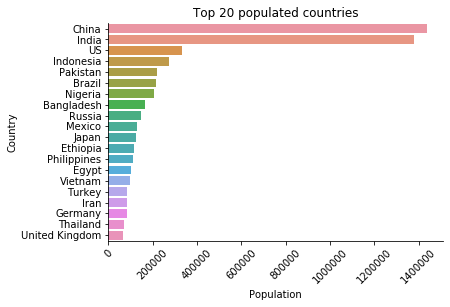

In [35]:
top_20 =country_totals.sort_values(by=['Population'], ascending=False).head(20)

sns.barplot(x = "Population", y='Country', data=top_20)
sns.despine()
plt.xlabel('Population')
plt.xticks(rotation=45)
plt.title("Top 20 populated countries")

Text(0.5, 1.0, 'Covid-19 - Impact to Top 10 populated countries by Mortality Rate')

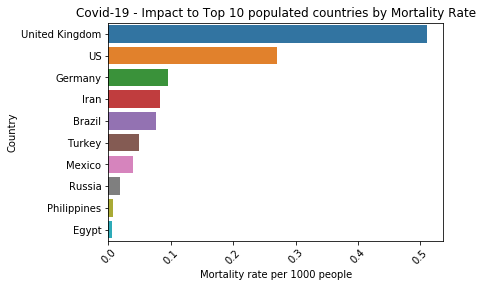

In [36]:
top_20 =country_totals.sort_values(by=['Population'], ascending=False).head(20)
data =top_20.sort_values(by=['Death rate'], ascending=False).head(10)

sns.barplot(x = "Death rate", y='Country', data=data)
plt.xticks(rotation=45)
plt.xlabel('Mortality rate per 1000 people')
plt.title("Covid-19 - Impact to Top 10 populated countries by Mortality Rate")

## Visualizing on a Map

In [37]:
covid_deaths[today_date].sum()

315185

In [38]:
covid_deaths_agg = covid_deaths.groupby('Country/Region').sum().reset_index()
covid_deaths_agg.loc[:, ['Lat', 'Long']] = covid_deaths.groupby('Country/Region').mean().reset_index().loc[:, ['Lat', 'Long']]
covid_deaths_agg

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
184,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,7,7,8,9,10,12,12,15,18,20
186,Zambia,-15.416700,28.283300,0,0,0,0,0,0,0,...,4,7,7,7,7,7,7,7,7,7


In [39]:
# filter to cases above 1 death
MIN_CASES = 1
covid_deaths_agg = covid_deaths_agg[covid_deaths_agg.iloc[:, 3:].max(axis=1) >= MIN_CASES]
covid_deaths_agg.head()
 

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [40]:
# check country/region
covid_deaths_agg['Country/Region'].value_counts()

Turkey          1
Liberia         1
Senegal         1
Cameroon        1
Estonia         1
               ..
Taiwan*         1
Yemen           1
South Africa    1
Latvia          1
Djibouti        1
Name: Country/Region, Length: 165, dtype: int64

In [41]:
# transpose values for dates using pd.melt
covid_deaths2 = pd.melt(covid_deaths_agg, 
                        id_vars=covid_deaths_agg.iloc[:, :3],
                        var_name="Date",
                        value_vars=covid_deaths_agg.iloc[:, 3:],
                        value_name="Deaths")
print(covid_deaths2.shape)
covid_deaths2.head()

(19305, 5)


,Country/Region,Lat,Long,Date,Deaths
0,Afghanistan,33.0000,65.0000,1/22/20,0
1,Albania,41.1533,20.1683,1/22/20,0
2,Algeria,28.0339,1.6596,1/22/20,0
3,Andorra,42.5063,1.5218,1/22/20,0
4,Angola,-11.2027,17.8739,1/22/20,0


In [42]:
# today's total deaths
deaths_totals = covid_deaths2[(covid_deaths2['Date'] == today_date)]
deaths_totals

,Country/Region,Lat,Long,Date,Deaths
19140,Afghanistan,33.000000,65.000000,5/17/20,169
19141,Albania,41.153300,20.168300,5/17/20,31
19142,Algeria,28.033900,1.659600,5/17/20,548
19143,Andorra,42.506300,1.521800,5/17/20,51
19144,Angola,-11.202700,17.873900,5/17/20,2
...,...,...,...,...,...
19300,Venezuela,6.423800,-66.589700,5/17/20,10
19301,West Bank and Gaza,31.952200,35.233200,5/17/20,2
19302,Yemen,15.552727,48.516388,5/17/20,20
19303,Zambia,-15.416700,28.283300,5/17/20,7


In [43]:
# check
deaths_totals['Deaths'].sum()

315185

In [44]:
deaths_totals.sort_values(by='Deaths', ascending=False)

,Country/Region,Lat,Long,Date,Deaths
19294,US,37.090200,-95.712900,5/17/20,89562
19297,United Kingdom,24.548173,-43.902245,5/17/20,34716
19217,Italy,43.000000,12.000000,5/17/20,31908
19196,France,8.305673,5.429018,5/17/20,28111
19279,Spain,40.000000,-4.000000,5/17/20,27563
...,...,...,...,...,...
19175,Comoros,-11.645500,43.333300,5/17/20,1
19235,Madagascar,-18.766900,46.869100,5/17/20,1
19282,Suriname,3.919300,-56.027800,5/17/20,1
19161,Botswana,-22.328500,24.684900,5/17/20,1


In [45]:
# # Show on map - have to install plotly to show this
# import plotly.express as px
# fig = px.scatter_geo(covid_deaths2,
#                      lat="Lat", lon="Long", color="Country/Region",
#                      hover_name="Country/Region", 
#                      size="Deaths",
#                      size_max=50, animation_frame="Date",
#                      template='plotly_dark', projection="natural earth",
#                      title="COVID-19 worldwide deaths over time")                    
# fig.show()

## Merge files with Population data

In [46]:
# already read population file 
# need to double check this against UN data
# reset index
current_populations = current_populations.sort_values(by='Population', ascending=False).reset_index()
current_populations

,Country,Population
0,China,1439323.774
1,India,1380004.385
2,US,331002.647
3,Indonesia,273523.621
4,Pakistan,220892.331
...,...,...
174,Saint Kitts and Nevis,53.192
175,Monaco,39.244
176,Liechtenstein,38.137
177,San Marino,33.938


In [47]:
left = deaths_totals
right = current_populations
df = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="Country/Region", right_on="Country")
df

,Country/Region,Lat,Long,Date,Deaths,Country,Population
0,Afghanistan,33.0000,65.0000,5/17/20,169.0,Afghanistan,38928.341
1,Albania,41.1533,20.1683,5/17/20,31.0,Albania,2877.800
2,Algeria,28.0339,1.6596,5/17/20,548.0,Algeria,43851.043
3,Andorra,42.5063,1.5218,5/17/20,51.0,Andorra,77.265
4,Angola,-11.2027,17.8739,5/17/20,2.0,Angola,32866.268
...,...,...,...,...,...,...,...
184,NaN,NaN,NaN,NaN,NaN,Saint Vincent and the Grenadines,110.947
185,NaN,NaN,NaN,NaN,NaN,Seychelles,98.340
186,NaN,NaN,NaN,NaN,NaN,Dominica,71.991
187,NaN,NaN,NaN,NaN,NaN,Saint Kitts and Nevis,53.192


In [48]:
df.isna().sum()

Country/Region    24
Lat               24
Long              24
Date              24
Deaths            24
Country           10
Population        10
dtype: int64

In [49]:
df[df['Deaths'].isna()]

,Country/Region,Lat,Long,Date,Deaths,Country,Population
165,NaN,NaN,NaN,NaN,NaN,Vietnam,97338.583
166,NaN,NaN,NaN,NaN,NaN,Uganda,45741.000
167,NaN,NaN,NaN,NaN,NaN,Mozambique,31255.435
168,NaN,NaN,NaN,NaN,NaN,Cambodia,16718.971
169,NaN,NaN,NaN,NaN,NaN,Rwanda,12952.209
170,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,8947.027
171,NaN,NaN,NaN,NaN,NaN,Central African Republic,4829.764
172,NaN,NaN,NaN,NaN,NaN,Eritrea,3546.427
173,NaN,NaN,NaN,NaN,NaN,Mongolia,3278.292
174,NaN,NaN,NaN,NaN,NaN,Namibia,2540.916


In [50]:
df.dropna(subset=['Deaths'], inplace=True)
df.isna().sum()

Country/Region     0
Lat                0
Long               0
Date               0
Deaths             0
Country           10
Population        10
dtype: int64

In [51]:
df.drop(['Country'], axis=1, inplace=True)
df.isna().sum()

Country/Region     0
Lat                0
Long               0
Date               0
Deaths             0
Population        10
dtype: int64

In [52]:
df[df['Population'].isna()]

,Country/Region,Lat,Long,Date,Deaths,Population
11,Bahamas,25.034300,-77.396300,5/17/20,11.0,NaN
26,Burma,21.916200,95.956000,5/17/20,6.0,NaN
36,Congo (Brazzaville),-4.038300,21.758700,5/17/20,15.0,NaN
37,Congo (Kinshasa),-4.038300,21.758700,5/17/20,61.0,NaN
45,Diamond Princess,0.000000,0.000000,5/17/20,13.0,NaN
58,Gambia,13.443200,-15.310100,5/17/20,1.0,NaN
84,Kosovo,42.602636,20.902977,5/17/20,29.0,NaN
94,MS Zaandam,0.000000,0.000000,5/17/20,2.0,NaN
104,Moldova,47.411600,28.369900,5/17/20,211.0,NaN
161,West Bank and Gaza,31.952200,35.233200,5/17/20,2.0,NaN


In [53]:
df['Deaths'].sum()

315185.0

## Merge with Other File

In [54]:
ls

2020-05-17/
AnalysisSG.ipynb
Current_Deaths.png
DATA choice.ipynb
Feature Engineering Coronavirus - DATA-Copy1.ipynb
Feature Engineering Coronavirus - DATA.ipynb
Mortality for Democracies.png
Mortality for Non-Democracies.png
MortalitySorted.png
TransformEIU.ipynb
archived_data/


In [55]:
# read in EIU raw_data after running script
test = '../data/Other/Democracy Index 2019.csv'
EIU = pd.read_csv(test, sep=",")
EIU.head()

,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
0,Norway,9.87,1,10.00,9.64,10.00,10.00,9.71
1,Iceland,9.58,2,10.00,9.29,8.89,10.00,9.71
2,Sweden,9.39,3,9.58,9.64,8.33,10.00,9.41
3,New Zealand,9.26,4,10.00,9.29,8.89,8.13,10.00
4,Finland,9.25,5,10.00,8.93,8.89,8.75,9.71


In [56]:
EIU['Country name'].unique()

array(['Norway', 'Iceland', 'Sweden', 'New Zealand', 'Finland', 'Ireland',
       'Denmark', 'Canada', 'Australia', 'Switzerland', 'Netherlands',
       'Luxembourg', 'Germany', 'United Kingdom', 'Uruguay', 'Austria',
       'Spain', 'Mauritius', 'Costa Rica', 'France', 'Chile', 'Portugal',
       'South Korea', 'Japan', 'United States of America', 'Malta',
       'Estonia', 'Israel', 'Botswana', 'Cabo Verde', 'Taiwan',
       'Czech Republic', 'Belgium', 'Cyprus', 'Italy', 'Slovenia',
       'Lithuania', 'Latvia', 'Greece', 'South Africa', 'Timor-Leste',
       'Slovakia', 'Malaysia', 'Trinidad and Tobago', 'Colombia',
       'Panama', 'Bulgaria', 'Argentina', 'Suriname', 'Jamaica', 'India',
       'Brazil', 'Tunisia', 'Philippines', 'Ghana', 'Hungary', 'Poland',
       'Peru', 'Croatia', 'Dominican Republic', 'Lesotho', 'Mongolia',
       'Romania', 'Indonesia', 'Namibia', 'Serbia', 'Ecuador', 'Thailand',
       'Sri Lanka', 'Paraguay', 'El Salvador', 'Guyana', 'Mexico',
       'Papu

In [57]:
EIU[EIU['Country name']=="United States of America"]

,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
24,United States of America,7.96,25,9.17,7.14,7.78,7.5,8.24


In [58]:
EIU[EIU['Country name']=="China"]

,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
152,China,2.26,153,0.0,4.29,3.33,2.5,1.18


In [59]:
EIU[EIU['Country name']=="Russia"]

,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
134,Russia,3.11,134,2.17,1.79,5.0,2.5,4.12


In [60]:
EIU.sort_values(by="Overall Score", ascending=True).head(15)

,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
166,North Korea,1.08,167,0.00,2.50,1.67,1.25,0.00
165,Democratic Republic of Congo,1.13,166,0.00,0.00,1.67,3.13,0.88
164,Central African Republic,1.32,165,1.25,0.00,1.11,1.88,2.35
163,Syria,1.43,164,0.00,0.00,2.78,4.38,0.00
162,Chad,1.61,163,0.00,0.00,1.67,3.75,2.65
161,Turkmenistan,1.72,162,0.00,0.79,2.22,5.00,0.59
160,Equatorial Guinea,1.92,161,0.00,0.43,3.33,4.38,1.47
159,Tajikistan,1.93,159,0.08,0.79,1.67,6.25,0.88
158,Saudi Arabia,1.93,159,0.00,2.86,2.22,3.13,1.47
157,Yemen,1.95,158,0.00,0.00,3.89,5.00,0.88


In [61]:
left = df
right = EIU
politics_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="Country/Region", right_on="Country name")
politics_deaths

,Country/Region,Lat,Long,Date,Deaths,Population,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
0,Afghanistan,33.0000,65.0000,5/17/20,169.0,38928.341,Afghanistan,2.85,141.0,3.42,0.64,3.89,2.50,3.82
1,Albania,41.1533,20.1683,5/17/20,31.0,2877.800,Albania,5.89,79.0,7.00,5.36,4.44,5.00,7.65
2,Algeria,28.0339,1.6596,5/17/20,548.0,43851.043,Algeria,4.01,113.0,3.08,2.86,5.00,5.00,4.12
3,Andorra,42.5063,1.5218,5/17/20,51.0,77.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,-11.2027,17.8739,5/17/20,2.0,32866.268,Angola,3.72,119.0,2.25,2.86,5.56,5.00,2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,NaN,NaN,NaN,NaN,NaN,NaN,Laos,2.14,155.0,0.00,2.86,1.67,5.00,1.18
190,NaN,NaN,NaN,NaN,NaN,NaN,Turkmenistan,1.72,162.0,0.00,0.79,2.22,5.00,0.59
191,NaN,NaN,NaN,NaN,NaN,NaN,Central African Republic,1.32,165.0,1.25,0.00,1.11,1.88,2.35
192,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of Congo,1.13,166.0,0.00,0.00,1.67,3.13,0.88


In [62]:
politics_deaths.isna().sum()

Country/Region                     29
Lat                                29
Long                               29
Date                               29
Deaths                             29
Population                         39
Country name                       27
Overall Score                      27
Rank                               27
Electoral process and pluralism    27
Functioning of government          27
Political participation            27
Political culture                  27
Civil liberties                    27
dtype: int64

In [63]:
sortA = politics_deaths[politics_deaths['Country name'].isna()]
sortA

,Country/Region,Lat,Long,Date,Deaths,Population,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
3,Andorra,42.506300,1.521800,5/17/20,51.0,77.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Antigua and Barbuda,17.060800,-61.796400,5/17/20,3.0,97.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Bahamas,25.034300,-77.396300,5/17/20,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Barbados,13.193900,-59.543200,5/17/20,7.0,287.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Belize,13.193900,-59.543200,5/17/20,2.0,397.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Bosnia and Herzegovina,43.915900,17.679100,5/17/20,133.0,3280.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Brunei,4.535300,114.727700,5/17/20,1.0,437.483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Burma,21.916200,95.956000,5/17/20,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Congo (Kinshasa),-4.038300,21.758700,5/17/20,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Cote d'Ivoire,7.540000,-5.547100,5/17/20,27.0,26378.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
sortA['Country/Region'].unique()

array(['Andorra', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize',
       'Bosnia and Herzegovina', 'Brunei', 'Burma', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Czechia', 'Diamond Princess', 'Eswatini',
       'Korea, South', 'Kosovo', 'Kyrgyzstan', 'Liechtenstein',
       'MS Zaandam', 'Maldives', 'Monaco', 'San Marino',
       'Sao Tome and Principe', 'Somalia', 'South Sudan', 'Taiwan*', 'US',
       'West Bank and Gaza'], dtype=object)

In [65]:
sortB = politics_deaths[politics_deaths['Country/Region'].isna()]
sortB.head()

,Country/Region,Lat,Long,Date,Deaths,Population,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
165,NaN,NaN,NaN,NaN,NaN,NaN,South Korea,8.00,23.0,9.17,7.86,7.22,7.50,8.24
166,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,7.96,25.0,9.17,7.14,7.78,7.50,8.24
167,NaN,NaN,NaN,NaN,NaN,NaN,Taiwan,7.73,31.0,9.58,8.21,6.11,5.63,9.12
168,NaN,NaN,NaN,NaN,NaN,NaN,Czech Republic,7.69,32.0,9.58,6.79,6.67,6.88,8.53
169,NaN,NaN,NaN,NaN,NaN,NaN,Timor-Leste,7.19,41.0,9.58,6.29,5.56,6.88,7.65


In [66]:
sortB['Country name'].unique()

array(['South Korea', 'United States of America', 'Taiwan',
       'Czech Republic', 'Timor-Leste', 'Lesotho', 'Mongolia', 'Namibia',
       'Papua New Guinea', 'Hong Kong', 'Fiji', 'Bhutan', 'Uganda',
       'Kyrgyz Republic', 'Bosnia and Hercegovina', 'Côte d’Ivoire',
       'Palestine', 'Mozambique', 'Myanmar', 'Cambodia', 'Rwanda',
       'eSwatini', 'Vietnam', 'Eritrea', 'Laos', 'Turkmenistan',
       'Central African Republic', 'Democratic Republic of Congo',
       'North Korea'], dtype=object)

In [67]:
replace_names = ['Bosnia and Hercegovina', 'Democratic Republic of Congo', 'Czech Republic',
                 'South Korea', 'Taiwan', 'United States of America']
replace_with = ['Bosnia and Herzegovina', 'Congo (Kinshasa)', 'Czechia',
                'Korea, South', 'Taiwan*', 'US']

replace_dict = {'Bosnia and Hercegovina':'Bosnia and Herzegovina', 
                'Democratic Republic of Congo':'Congo (Kinshasa)', 
                'Czech Republic':'Czechia',
                'South Korea':'Korea, South', 
                'Taiwan':'Taiwan*', 'United States of America':'US'}


In [68]:
politics_deaths.replace({"Country name": replace_dict},inplace=True)
politics_deaths['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', nan, 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Mada

In [69]:
newEIU = EIU.replace({"Country name": replace_dict},inplace=True)

In [70]:
left = df
right = EIU
pol_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="Country/Region", right_on="Country name")
pol_deaths.isna().sum()

Country/Region                     23
Lat                                23
Long                               23
Date                               23
Deaths                             23
Population                         33
Country name                       21
Overall Score                      21
Rank                               21
Electoral process and pluralism    21
Functioning of government          21
Political participation            21
Political culture                  21
Civil liberties                    21
dtype: int64

In [71]:
pol_deaths[pol_deaths['Country name'].isna()]

,Country/Region,Lat,Long,Date,Deaths,Population,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
3,Andorra,42.506300,1.521800,5/17/20,51.0,77.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Antigua and Barbuda,17.060800,-61.796400,5/17/20,3.0,97.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Bahamas,25.034300,-77.396300,5/17/20,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Barbados,13.193900,-59.543200,5/17/20,7.0,287.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Belize,13.193900,-59.543200,5/17/20,2.0,397.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Brunei,4.535300,114.727700,5/17/20,1.0,437.483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Burma,21.916200,95.956000,5/17/20,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Cote d'Ivoire,7.540000,-5.547100,5/17/20,27.0,26378.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Diamond Princess,0.000000,0.000000,5/17/20,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Eswatini,-26.522500,31.465900,5/17/20,2.0,1160.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
pol_deaths.replace({"Country/Region": ["Andorra", "Diamond Princess", "San Marino"]},{"Country name": ["Andorra", "Diamond Princess", "San Marino"]},inplace=True)

In [73]:
pol_deaths['Deaths'].sum()

315185.0

In [74]:
pol_deaths.isna().sum()

Country/Region                     23
Lat                                23
Long                               23
Date                               23
Deaths                             23
Population                         33
Country name                       21
Overall Score                      21
Rank                               21
Electoral process and pluralism    21
Functioning of government          21
Political participation            21
Political culture                  21
Civil liberties                    21
dtype: int64

In [75]:
pol_deaths.dropna(subset=['Deaths'], inplace=True)
pol_deaths.isna().sum()

Country/Region                      0
Lat                                 0
Long                                0
Date                                0
Deaths                              0
Population                         10
Country name                       21
Overall Score                      21
Rank                               21
Electoral process and pluralism    21
Functioning of government          21
Political participation            21
Political culture                  21
Civil liberties                    21
dtype: int64

In [76]:
pol_deaths.head()

,Country/Region,Lat,Long,Date,Deaths,Population,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
0,Afghanistan,33.0000,65.0000,5/17/20,169.0,38928.341,Afghanistan,2.85,141.0,3.42,0.64,3.89,2.5,3.82
1,Albania,41.1533,20.1683,5/17/20,31.0,2877.800,Albania,5.89,79.0,7.00,5.36,4.44,5.0,7.65
2,Algeria,28.0339,1.6596,5/17/20,548.0,43851.043,Algeria,4.01,113.0,3.08,2.86,5.00,5.0,4.12
3,Andorra,42.5063,1.5218,5/17/20,51.0,77.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,-11.2027,17.8739,5/17/20,2.0,32866.268,Angola,3.72,119.0,2.25,2.86,5.56,5.0,2.94


In [77]:
pol_deaths.sort_values(by=['Deaths'], ascending=False).head(20)

,Country/Region,Lat,Long,Date,Deaths,Population,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
154,US,37.090200,-95.712900,5/17/20,89562.0,331002.647,US,7.96,25.0,9.17,7.14,7.78,7.50,8.24
157,United Kingdom,24.548173,-43.902245,5/17/20,34716.0,67886.004,United Kingdom,8.52,14.0,9.58,7.50,8.89,7.50,9.12
77,Italy,43.000000,12.000000,5/17/20,31908.0,60461.828,Italy,7.52,35.0,9.58,6.07,7.78,6.25,7.94
56,France,8.305673,5.429018,5/17/20,28111.0,65273.512,France,8.12,20.0,9.58,7.86,7.78,6.88,8.53
139,Spain,40.000000,-4.000000,5/17/20,27563.0,46754.783,Spain,8.29,16.0,9.58,7.14,7.78,8.13,8.82
22,Brazil,-14.235000,-51.925300,5/17/20,16118.0,212559.409,Brazil,6.86,52.0,9.58,5.36,6.11,5.00,8.24
16,Belgium,50.833300,4.000000,5/17/20,9052.0,11589.616,Belgium,7.64,33.0,9.58,8.21,5.00,6.88,8.53
60,Germany,51.000000,9.000000,5/17/20,7962.0,83783.945,Germany,8.68,13.0,9.58,8.57,8.33,7.50,9.41
73,Iran,32.000000,53.000000,5/17/20,6988.0,83992.953,Iran,2.38,151.0,0.00,2.86,4.44,3.13,1.47
30,Canada,47.982907,-88.402064,5/17/20,5903.0,37742.157,Canada,9.22,7.0,9.58,9.64,7.78,9.38,9.71


In [78]:
pol_deaths.sort_values(by=['Deaths'], ascending=False).tail(20)

,Country/Region,Lat,Long,Date,Deaths,Population,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
5,Antigua and Barbuda,17.060800,-61.796400,5/17/20,3.0,97.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Libya,26.335100,17.228331,5/17/20,3.0,6871.287,Libya,2.02,156.0,0.00,0.00,2.78,4.38,2.94
145,Syria,34.802075,38.996815,5/17/20,3.0,17500.657,Syria,1.43,164.0,0.00,0.00,2.78,4.38,0.00
28,Cabo Verde,16.538800,-23.041800,5/17/20,3.0,555.988,Cabo Verde,7.78,30.0,9.17,7.36,6.67,6.88,8.82
96,Malawi,-13.254308,34.301525,5/17/20,3.0,19129.955,Malawi,5.50,87.0,6.08,4.29,5.00,6.25,5.88
4,Angola,-11.202700,17.873900,5/17/20,2.0,32866.268,Angola,3.72,119.0,2.25,2.86,5.56,5.00,2.94
161,West Bank and Gaza,31.952200,35.233200,5/17/20,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Eswatini,-26.522500,31.465900,5/17/20,2.0,1160.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,MS Zaandam,0.000000,0.000000,5/17/20,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Nepal,28.166700,84.250000,5/17/20,2.0,29136.808,Nepal,5.28,92.0,4.83,5.36,5.00,5.63,5.59


In [79]:
rates = pol_deaths.copy()
rates.drop(['Country name'], axis=1, inplace=True)

In [80]:
rates['MortalityByPopulation'] = rates['Deaths'] / rates['Population']
rates['MortalityByScore'] = rates['Deaths'] / rates['Overall Score']
rates.sort_values(by=['Deaths'], ascending=False).head(20)

,Country/Region,Lat,Long,Date,Deaths,Population,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties,MortalityByPopulation,MortalityByScore
154,US,37.090200,-95.712900,5/17/20,89562.0,331002.647,7.96,25.0,9.17,7.14,7.78,7.50,8.24,0.270578,11251.507538
157,United Kingdom,24.548173,-43.902245,5/17/20,34716.0,67886.004,8.52,14.0,9.58,7.50,8.89,7.50,9.12,0.511387,4074.647887
77,Italy,43.000000,12.000000,5/17/20,31908.0,60461.828,7.52,35.0,9.58,6.07,7.78,6.25,7.94,0.527738,4243.085106
56,France,8.305673,5.429018,5/17/20,28111.0,65273.512,8.12,20.0,9.58,7.86,7.78,6.88,8.53,0.430665,3461.945813
139,Spain,40.000000,-4.000000,5/17/20,27563.0,46754.783,8.29,16.0,9.58,7.14,7.78,8.13,8.82,0.589523,3324.849216
22,Brazil,-14.235000,-51.925300,5/17/20,16118.0,212559.409,6.86,52.0,9.58,5.36,6.11,5.00,8.24,0.075828,2349.562682
16,Belgium,50.833300,4.000000,5/17/20,9052.0,11589.616,7.64,33.0,9.58,8.21,5.00,6.88,8.53,0.781044,1184.816754
60,Germany,51.000000,9.000000,5/17/20,7962.0,83783.945,8.68,13.0,9.58,8.57,8.33,7.50,9.41,0.095030,917.281106
73,Iran,32.000000,53.000000,5/17/20,6988.0,83992.953,2.38,151.0,0.00,2.86,4.44,3.13,1.47,0.083197,2936.134454
30,Canada,47.982907,-88.402064,5/17/20,5903.0,37742.157,9.22,7.0,9.58,9.64,7.78,9.38,9.71,0.156403,640.238612


In [81]:
rates.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Deaths', 'Population',
       'Overall Score', 'Rank', 'Electoral process and pluralism',
       'Functioning of government', 'Political participation',
       'Political culture', 'Civil liberties', 'MortalityByPopulation',
       'MortalityByScore'],
      dtype='object')

In [82]:
rates.drop(['Lat','Long','Date', 'Rank'], axis=1, inplace=True)

In [83]:
rates.drop(['Electoral process and pluralism',
       'Functioning of government', 'Political participation',
       'Political culture', 'Civil liberties',
       'MortalityByScore'], axis=1, inplace=True)

In [84]:
rates.sort_values(by=['Deaths'], ascending=False).head(20)

,Country/Region,Deaths,Population,Overall Score,MortalityByPopulation
154,US,89562.0,331002.647,7.96,0.270578
157,United Kingdom,34716.0,67886.004,8.52,0.511387
77,Italy,31908.0,60461.828,7.52,0.527738
56,France,28111.0,65273.512,8.12,0.430665
139,Spain,27563.0,46754.783,8.29,0.589523
22,Brazil,16118.0,212559.409,6.86,0.075828
16,Belgium,9052.0,11589.616,7.64,0.781044
60,Germany,7962.0,83783.945,8.68,0.095030
73,Iran,6988.0,83992.953,2.38,0.083197
30,Canada,5903.0,37742.157,9.22,0.156403


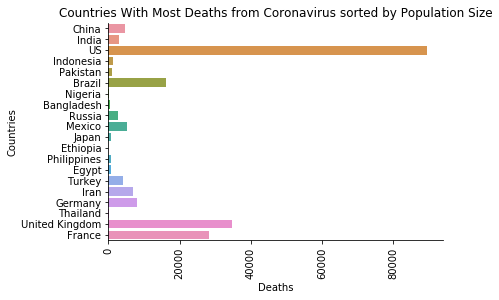

In [85]:
data =rates.sort_values(by=['Population'], ascending=False).head(20)
sns.barplot(x = "Deaths", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Deaths')
plt.ylabel('Countries')
plt.title("Countries With Most Deaths from Coronavirus sorted by Population Size")
plt.savefig('DeathsbyPop.png')

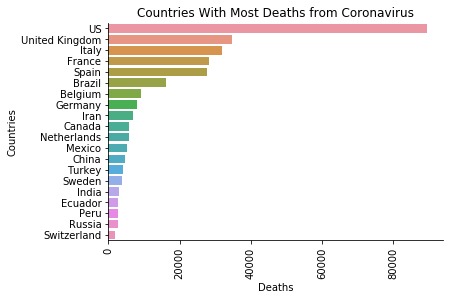

In [86]:
data =rates.sort_values(by=['Deaths'], ascending=False).head(20)
sns.barplot(x = "Deaths", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Deaths')
plt.ylabel('Countries')
plt.title("Countries With Most Deaths from Coronavirus")
plt.savefig('Deaths.png')

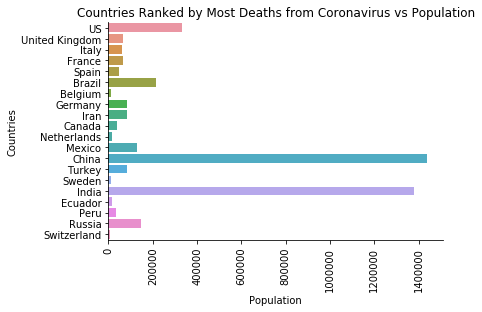

In [87]:
sns.barplot(x = "Population", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Population')
plt.ylabel('Countries')
plt.title("Countries Ranked by Most Deaths from Coronavirus vs Population")
plt.savefig('Population.png')

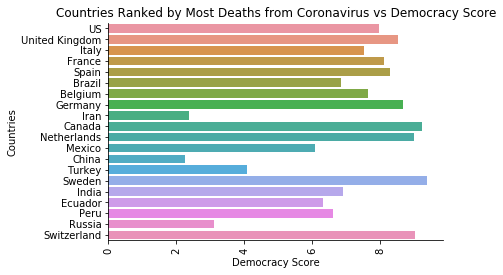

In [88]:
sns.barplot(x = "Overall Score", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Democracy Score')
plt.ylabel('Countries')
plt.title("Countries Ranked by Most Deaths from Coronavirus vs Democracy Score")
plt.savefig('DemocracyScore.png')

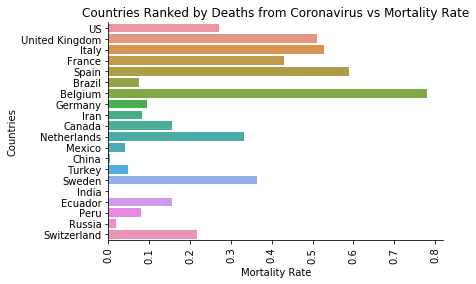

In [89]:
sns.barplot(x = "MortalityByPopulation", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Mortality Rate')
plt.ylabel('Countries')
plt.title("Countries Ranked by Deaths from Coronavirus vs Mortality Rate")
plt.savefig('Mortality.png')

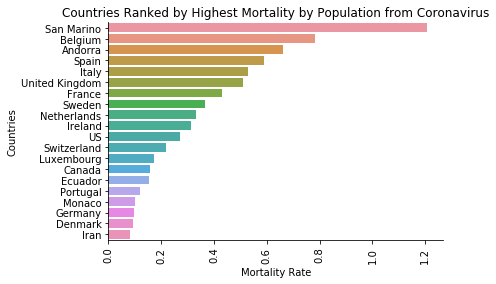

In [90]:
data =rates.sort_values(by=['MortalityByPopulation'], ascending=False).head(20)
sns.barplot(x = "MortalityByPopulation", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Mortality Rate')
plt.ylabel('Countries')
plt.title("Countries Ranked by Highest Mortality by Population from Coronavirus")
plt.savefig('MortalitySorted.png')

Need to narrow down to top 100 by Population before sorting into Democracy Score.
This was too large and so narrowed down to Top 20 Countries by Population

In [91]:
rates.sort_values(by=['Population'], ascending=False).head(20)


,Country/Region,Deaths,Population,Overall Score,MortalityByPopulation
33,China,4638.0,1439323.774,2.26,0.003222
71,India,3025.0,1380004.385,6.90,0.002192
154,US,89562.0,331002.647,7.96,0.270578
72,Indonesia,1148.0,273523.621,6.48,0.004197
117,Pakistan,873.0,220892.331,4.25,0.003952
22,Brazil,16118.0,212559.409,6.86,0.075828
113,Nigeria,182.0,206139.587,4.12,0.000883
13,Bangladesh,328.0,164689.383,5.88,0.001992
126,Russia,2631.0,145934.460,3.11,0.018029
103,Mexico,5177.0,128932.753,6.09,0.040153


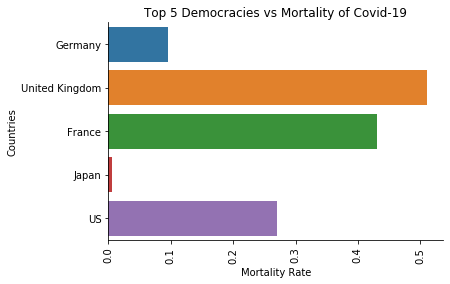

In [92]:
rates = rates.sort_values(by=['Population'], ascending=False).head(20)
data =rates.sort_values(by=['Overall Score'], ascending=False).head(5)
sns.barplot(x = "MortalityByPopulation", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Mortality Rate')
plt.ylabel('Countries')
plt.title("Top 5 Democracies vs Mortality of Covid-19")
plt.savefig('Mortality for Democracies.png')

In [93]:
data1 = data.mean()
data1

Deaths                    32219.000000
Population               134884.513200
Overall Score                 8.254000
MortalityByPopulation         0.262708
dtype: float64

Out of the Top 5 democracies (based on EIU score), Japan did a great job (so far) but the UK, France and the US had high mortality rates.
This means they had a lot of people die and had a lot more go to the hospital for treatment.

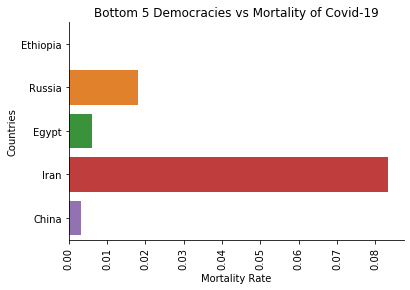

In [94]:
rates = rates.sort_values(by=['Population'], ascending=False).head(20)
data =rates.sort_values(by=['Overall Score'], ascending=False).tail(5)
sns.barplot(x = "MortalityByPopulation", y='Country/Region', data=data)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Mortality Rate')
plt.ylabel('Countries')
plt.title("Bottom 5 Democracies vs Mortality of Covid-19")
plt.savefig('Mortality for Non-Democracies.png')

In [95]:
data2 = data.mean()
data2

Deaths                     2978.40000
Population               377309.83460
Overall Score                 2.85000
MortalityByPopulation         0.02213
dtype: float64

In [96]:
ratio = data1/data2
ratio

Deaths                   10.817553
Population                0.357490
Overall Score             2.896140
MortalityByPopulation    11.871334
dtype: float64

### May 17, 2020 Summary:
- The bottom 5 democracies aka communists (out of the most populated 20 countries), fared better than the top 5 democracies.
- The communist countries average mortality rate (0.022) is much lower (~ 12X lower) than the top 5 democracies (0.26).
- That means that out of the most populated countries, on average, those with democracies did much worse managing Covid-19 deaths...so far.

Now onto ML predictions!